<a href="https://www.kaggle.com/code/achmadhendy/indonesia-covid-data-analysis-2021-2022?scriptVersionId=102016661" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h2>INDONESIA COVID DATA ANALYSIS (2021/01/01 - 2022/06/28)</h2>
By : Achmad Hendy

This project aims to show the trend of COVID-19 in Indonesia from early 2021 to 28th June 2022.

We are focusing on 2 objectives that are <b>new cases</b> and **vaccination percentage.**

We collect and use data from Our World in Data https://ourworldindata.org/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

The type of data source we use is .csv

In [2]:
covid = pd.read_csv( '../input/owid-covid-data-2022-06-28/owid-covid-data_29062022.csv')

<h3>Data Exploring

In [3]:
df = covid

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.895400e+05,1.892970e+05,1.881230e+05,1.709420e+05,170915.000000,169758.000000,188667.000000,188424.000000,187255.000000,170082.000000,...,122899.000000,121214.000000,79852.000000,144411.000000,184681.000000,158327.000000,6.712000e+03,6712.000000,6712.000000,6712.000000
mean,3.500601e+06,1.228805e+04,1.231176e+04,6.653659e+04,153.677893,154.579279,44830.642795,185.322740,185.509737,607.753956,...,10.639935,32.793936,50.904439,3.084859,73.645754,0.725116,4.214398e+04,9.908874,15.543936,1161.874855
std,2.199443e+07,8.655746e+04,8.488703e+04,3.459504e+05,777.948310,761.933637,83071.127486,939.036218,611.773334,893.500511,...,10.577659,13.533378,31.852751,2.552029,7.444207,0.149721,1.166042e+05,15.976706,28.878253,1606.463082
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.953750e+03,0.000000e+00,6.571000e+00,9.800000e+01,0.000000,0.143000,830.898000,0.000000,1.480000,24.675000,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,-1.850000e+00,-0.030000,-0.232500,-0.845097
50%,3.762000e+04,6.800000e+01,9.928600e+01,9.660000e+02,1.000000,1.857000,7074.038000,9.754000,19.219000,173.280000,...,6.300000,31.400000,49.839000,2.500000,75.050000,0.743000,4.599300e+03,6.780000,7.515000,612.671410
75%,4.045750e+05,1.009000e+03,1.121857e+03,8.699750e+03,17.000000,18.286000,56033.877500,101.215000,130.220500,886.987000,...,19.300000,41.300000,83.241000,4.000000,79.070000,0.845000,2.941022e+04,14.890000,21.570000,1840.485228
max,5.454557e+08,4.080568e+06,3.438035e+06,6.332579e+06,18156.000000,14783.714000,706541.904000,208049.887000,37617.428000,6399.483000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.217716e+06,111.010000,375.000000,9725.192865


In [6]:
df.shape

(197465, 67)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197465 entries, 0 to 197464
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    197465 non-null  object 
 1   continent                                   186014 non-null  object 
 2   location                                    197465 non-null  object 
 3   date                                        197465 non-null  object 
 4   total_cases                                 189540 non-null  float64
 5   new_cases                                   189297 non-null  float64
 6   new_cases_smoothed                          188123 non-null  float64
 7   total_deaths                                170942 non-null  float64
 8   new_deaths                                  170915 non-null  float64
 9   new_deaths_smoothed                         169758 non-null  float64
 

Check if there is duplicate(s) in the dataframe

In [8]:
df[df.duplicated()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million


<h3>Data Analysis

Since the dataframe contains data from 2020, we need to filter the date into only from year 2021 to 2022.

In [9]:
df1 = df[(df['date'] > '2021-01-01') & (df['date'] < '2022-12-31') & (df['location'] == 'Indonesia')]

In [10]:
df1

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
82733,IDN,Asia,Indonesia,2021-01-02,758473.0,7203.0,7376.571,22555.0,226.0,223.000,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
82734,IDN,Asia,Indonesia,2021-01-03,765350.0,6877.0,7426.429,22734.0,179.0,213.857,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
82735,IDN,Asia,Indonesia,2021-01-04,772103.0,6753.0,7554.857,22911.0,177.0,208.429,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
82736,IDN,Asia,Indonesia,2021-01-05,779548.0,7445.0,7489.429,23109.0,198.0,200.857,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
82737,IDN,Asia,Indonesia,2021-01-06,788402.0,8854.0,7611.143,23296.0,187.0,193.143,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83271,IDN,Asia,Indonesia,2022-06-24,6076894.0,2069.0,1607.143,156711.0,5.0,4.571,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
83272,IDN,Asia,Indonesia,2022-06-25,6078725.0,1831.0,1688.143,156714.0,3.0,4.286,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
83273,IDN,Asia,Indonesia,2022-06-26,6080451.0,1726.0,1768.000,156717.0,3.0,4.286,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN
83274,IDN,Asia,Indonesia,2022-06-27,6081896.0,1445.0,1805.857,156726.0,9.0,4.429,...,2.8,76.1,64.204,1.04,71.72,0.718,NaN,NaN,NaN,NaN


Now we can make a line plotting to see the trend of new cases until 28th June 2022.

Text(0.5, 1.0, 'COVID New Cases in Indonesia 2 Jan 2021 - 28 Jun 2022')

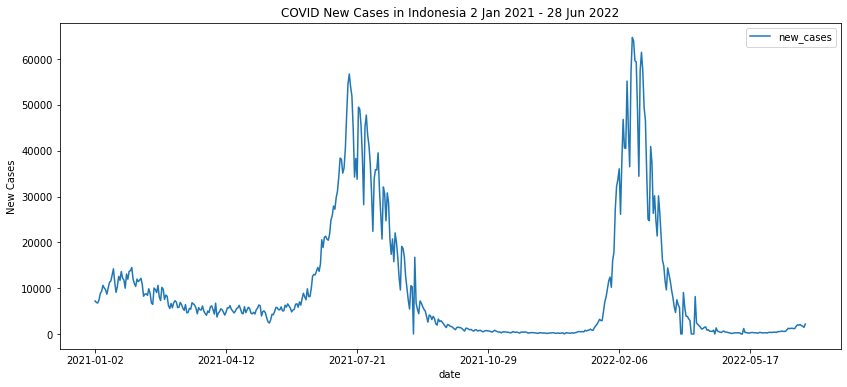

In [11]:
ax = df1.plot(x="date", y="new_cases", figsize=(14,6))
ax.set_ylabel('New Cases')
ax.set_title('COVID New Cases in Indonesia 2 Jan 2021 - 28 Jun 2022')

And also the trend of vaccination percentage.

In [12]:
df1['Vaccination_Percentage'] = df1['people_fully_vaccinated'] / df1['population']*100

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 82733 to 83275
Data columns (total 68 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    543 non-null    object 
 1   continent                                   543 non-null    object 
 2   location                                    543 non-null    object 
 3   date                                        543 non-null    object 
 4   total_cases                                 543 non-null    float64
 5   new_cases                                   543 non-null    float64
 6   new_cases_smoothed                          543 non-null    float64
 7   total_deaths                                543 non-null    float64
 8   new_deaths                                  543 non-null    float64
 9   new_deaths_smoothed                         543 non-null    float64
 10  total_ca

Text(0.5, 1.0, 'COVID Vaccination in Indonesia 2021 - 28 Jun 2022')

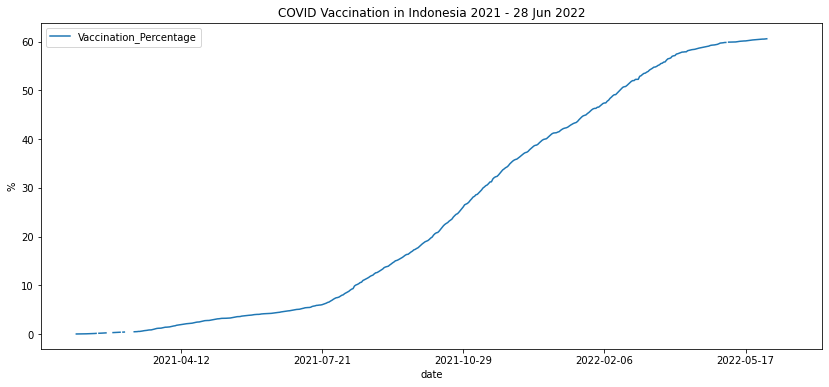

In [14]:
ax = df1.plot(x="date", y="Vaccination_Percentage", figsize=(14,6))
ax.set_ylabel('%')
ax.set_title('COVID Vaccination in Indonesia 2021 - 28 Jun 2022')

We also can see the vaccination percentage in asia continent.

In [15]:
df2 = df[(df['continent'] == 'Asia') & (df['population'] > 0)]

In [16]:
df2

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195796,YEM,Asia,Yemen,2022-06-24,11824.0,0.0,0.143,2149.0,0.0,0.0,...,7.6,29.2,49.542,0.7,66.12,0.470,NaN,NaN,NaN,NaN
195797,YEM,Asia,Yemen,2022-06-25,11824.0,0.0,0.143,2149.0,0.0,0.0,...,7.6,29.2,49.542,0.7,66.12,0.470,NaN,NaN,NaN,NaN
195798,YEM,Asia,Yemen,2022-06-26,11824.0,0.0,0.143,2149.0,0.0,0.0,...,7.6,29.2,49.542,0.7,66.12,0.470,NaN,NaN,NaN,NaN
195799,YEM,Asia,Yemen,2022-06-27,11824.0,0.0,0.143,2149.0,0.0,0.0,...,7.6,29.2,49.542,0.7,66.12,0.470,NaN,NaN,NaN,NaN


In [17]:
df3 = df2.groupby('location')[['people_fully_vaccinated', 'population']].max()
df3

,people_fully_vaccinated,population
location,,
Afghanistan,4.979930e+06,3.983543e+07
Armenia,9.858070e+05,2.968128e+06
Azerbaijan,4.853215e+06,1.022334e+07
Bahrain,1.222944e+06,1.748295e+06
Bangladesh,1.194227e+08,1.663035e+08
Bhutan,6.725750e+05,7.799000e+05
Brunei,4.267640e+05,4.415320e+05
Cambodia,1.436114e+07,1.694645e+07
China,1.260501e+09,1.444216e+09


In [18]:
df3['Vaccination_Percentage'] = df3['people_fully_vaccinated'] / df3['population']*100

In [19]:
df3

,people_fully_vaccinated,population,Vaccination_Percentage
location,,,
Afghanistan,4.979930e+06,3.983543e+07,12.501259
Armenia,9.858070e+05,2.968128e+06,33.213089
Azerbaijan,4.853215e+06,1.022334e+07,47.471894
Bahrain,1.222944e+06,1.748295e+06,69.950666
Bangladesh,1.194227e+08,1.663035e+08,71.810095
Bhutan,6.725750e+05,7.799000e+05,86.238620
Brunei,4.267640e+05,4.415320e+05,96.655282
Cambodia,1.436114e+07,1.694645e+07,84.744258
China,1.260501e+09,1.444216e+09,87.279251


In [20]:
df4 = df3.reset_index(level=['location'])

In [21]:
df4

,location,people_fully_vaccinated,population,Vaccination_Percentage
0,Afghanistan,4.979930e+06,3.983543e+07,12.501259
1,Armenia,9.858070e+05,2.968128e+06,33.213089
2,Azerbaijan,4.853215e+06,1.022334e+07,47.471894
3,Bahrain,1.222944e+06,1.748295e+06,69.950666
4,Bangladesh,1.194227e+08,1.663035e+08,71.810095
5,Bhutan,6.725750e+05,7.799000e+05,86.238620
6,Brunei,4.267640e+05,4.415320e+05,96.655282
7,Cambodia,1.436114e+07,1.694645e+07,84.744258
8,China,1.260501e+09,1.444216e+09,87.279251
9,Georgia,1.270848e+06,3.979773e+06,31.932676


In [22]:
df5 = df4.fillna(0)

In [23]:
df5

,location,people_fully_vaccinated,population,Vaccination_Percentage
0,Afghanistan,4.979930e+06,3.983543e+07,12.501259
1,Armenia,9.858070e+05,2.968128e+06,33.213089
2,Azerbaijan,4.853215e+06,1.022334e+07,47.471894
3,Bahrain,1.222944e+06,1.748295e+06,69.950666
4,Bangladesh,1.194227e+08,1.663035e+08,71.810095
5,Bhutan,6.725750e+05,7.799000e+05,86.238620
6,Brunei,4.267640e+05,4.415320e+05,96.655282
7,Cambodia,1.436114e+07,1.694645e+07,84.744258
8,China,1.260501e+09,1.444216e+09,87.279251
9,Georgia,1.270848e+06,3.979773e+06,31.932676


In [24]:
import plotly.express as px
 
data = df5
 
fig = px.choropleth(df5, locations='location',
                    locationmode="country names", color='Vaccination_Percentage', scope="asia",
                    title="Asia Vaccination % (28 Jun 2022)")
 
fig.show()